# AURORA 

## Setup

In [1]:
!pip install brainles_aurora matplotlib

%load_ext autoreload
%autoreload 2

  Using cached auxiliary-0.0.40-py3-none-any.whl.metadata (1.2 kB)
  Using cached nibabel-5.2.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached path-16.9.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached PyNaCl-1.5.0-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (856 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
Using cached auxiliary-0.0.40-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.2 MB/s eta 0:00:00
Using cached nibabel-5.2.0-py3-none-a

## Data

Aurora expects preprocessed input data as NIfTI file or NumPy Array.  
If your data is not preprocessed yet, consider using our [BrainLes preprocessing](https://github.com/BrainLesion/preprocessing) package (or its predecessor [BraTS-Toolkit](https://github.com/neuronflow/BraTS-Toolkit)).

In this example we provide sample data from the [ASNR-MICCAI BraTS Brain Metastasis Challenge](https://www.synapse.org/#!Synapse:syn51156910/wiki/622553), which is already preprocessed.

## Using Aurora

### Minimal example using default settings and only T1 as input

In [2]:
from brainles_aurora.inferer import AuroraGPUInferer, AuroraInferer, AuroraInfererConfig

config = AuroraInfererConfig(
    tta=False
)  # Disable test time augmentations for a quick demo, should be set to True for better results

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

_ = inferer.infer(
    t1="data/t1n.nii.gz",
    segmentation_file="output/segmentation.nii.gz",
)

2024-01-30 10:56:59 INFO: Initialized AuroraGPUInferer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
2024-01-30 10:56:59 INFO: Set torch device: cuda
2024-01-30 10:56:59 INFO: Infer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cuda
2024-01-30 10:56:59 INFO: Successfully validated input images. Input mode: NIFTI_FILEPATH
2024-01-30 10:56:59 INFO: Received files: T1: True, T1C: False, T2: False, FLAIR: False
2024-01-30 10:56:59 INFO: Inference mode: t1-o
2024-01-30 10:56:59 INFO: No loaded compatible model found. Loading Model and weights
2024-01-30 10:56:59 INFO: Setting up Dataloader
2024-01-30 10:56:59 INFO: Running inference on device := cuda


BasicUNet features: (32, 32, 64, 128, 256, 32).


2024-01-30 10:57:05 INFO: Applying test time augmentations
2024-01-30 10:58:29 INFO: Post-processing data
2024-01-30 10:58:29 INFO: Saving post-processed data as NIFTI files
2024-01-30 10:58:29 INFO: Saved segmentation to output/segmentation.nii.gz
2024-01-30 10:58:29 INFO: Returning post-processed data as Dict of Numpy arrays
2024-01-30 10:58:29 INFO: Finished inference 



Visualize results

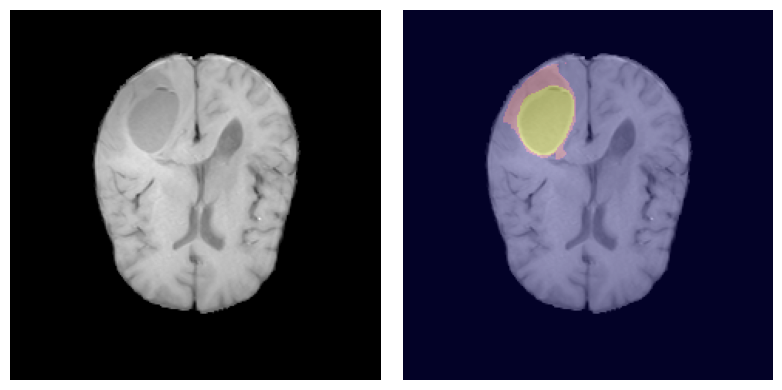

In [3]:
from utils import visualize_results

visualize_results(
    t1_file="data/t1n.nii.gz", segmentation_file="output/segmentation.nii.gz"
)

### Multiple input modalities and all available outputs

- Any of the following combination of sequences can be supplied: 
    - T1-CE + T1 + T2 + T2-FLAIR
    - T1-CE only
    - T1 only
    - T2-FLAIR only
    - T1-CE + T2-FLAIR
    - T1-CE + T1
    - T1-CE + T1 + T2-FLAIR
- Instead of only saving the final output consisting of one file with 2 labels, additional files with labels for the whole lesion (metastasis + edema) or the metastasis only can also be saved.
- Test-time augmentation can be enabled (tta parameter in config, default = True). Segmentation with TTA will take around 10 times longer than without TTA.

In [6]:
from brainles_aurora.inferer import AuroraGPUInferer, AuroraInferer, AuroraInfererConfig

config = AuroraInfererConfig()  # Use default config

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

# Use 4 input modalities, all outputs and a custom log file
_ = inferer.infer(
    t1="data/t1n.nii.gz",
    t1c="data/t1c.nii.gz",
    t2="data/t2w.nii.gz",
    fla="data/t2f.nii.gz",
    segmentation_file="output/segmentation.nii.gz",
    whole_tumor_unbinarized_floats_file="output/whole_tumor_unbinarized_floats.nii.gz",
    metastasis_unbinarized_floats_file="output/metastasis_unbinarized_floats.nii.gz",
    log_file="output/custom_logfile.log",
)

2024-01-30 11:01:00 INFO: Initialized AuroraGPUInferer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)


2024-01-30 11:01:00 INFO: Set torch device: cuda
2024-01-30 11:01:00 INFO: Infer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cuda
2024-01-30 11:01:00 INFO: Successfully validated input images. Input mode: NIFTI_FILEPATH
2024-01-30 11:01:00 INFO: Received files: T1: True, T1C: True, T2: True, FLAIR: True
2024-01-30 11:01:00 INFO: Inference mode: t1-t1c-t2-fla
2024-01-30 11:01:00 INFO: No loaded compatible model found. Loading Model and weights
2024-01-30 11:01:00 INFO: Setting up Dataloader
2024-01-30 11:01:00 INFO: Running inference on device := cuda


BasicUNet features: (32, 32, 64, 128, 256, 32).


2024-01-30 11:01:07 INFO: Applying test time augmentations
2024-01-30 11:02:36 INFO: Post-processing data
2024-01-30 11:02:36 INFO: Saving post-processed data as NIFTI files
2024-01-30 11:02:36 INFO: Saved segmentation to output/segmentation.nii.gz
2024-01-30 11:02:36 INFO: Saved whole_network to output/whole_tumor_unbinarized_floats.nii.gz
2024-01-30 11:02:36 INFO: Saved metastasis_network to output/metastasis_unbinarized_floats.nii.gz
2024-01-30 11:02:36 INFO: Returning post-processed data as Dict of Numpy arrays
2024-01-30 11:02:36 INFO: Finished inference 



### NumPy Inputs/ Outputs

In [5]:
from brainles_aurora.inferer import (
    AuroraGPUInferer,
    AuroraInferer,
    AuroraInfererConfig,
)
import nibabel as nib

config = AuroraInfererConfig()

# If you don-t have a GPU that supports CUDA use the CPU version: AuroraInferer(config=config)
inferer = AuroraGPUInferer(config=config)

# load data
t1_np = nib.load("data/t1n.nii.gz").get_fdata()
results = inferer.infer(t1=t1_np)
print([f"{k} : {v.shape}" for k, v in results.items()])

2024-01-30 10:58:38 INFO: Initialized AuroraGPUInferer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
2024-01-30 10:58:38 INFO: Set torch device: cuda
2024-01-30 10:58:38 INFO: Infer with config: AuroraInfererConfig(log_level=20, tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cuda
2024-01-30 10:58:38 INFO: Successfully validated input images. Input mode: NP_NDARRAY
2024-01-30 10:58:38 INFO: Received files: T1: True, T1C: False, T2: False, FLAIR: False
2024-01-30 10:58:38 INFO: Inference mode: t1-o
2024-01-30 10:58:38 INFO: No loaded compatible model found. Loading Model and weights
2024-01-30 10:58:38 INFO: Setting up Dataloader
2024-01-30 10:58:38 INFO: Running inference on device := cuda


BasicUNet features: (32, 32, 64, 128, 256, 32).


2024-01-30 10:58:44 INFO: Applying test time augmentations
2024-01-30 11:00:09 INFO: Post-processing data
2024-01-30 11:00:09 INFO: Returning post-processed data as Dict of Numpy arrays
2024-01-30 11:00:09 INFO: Finished inference 



['segmentation : (240, 240, 155)', 'whole_network : (240, 240, 155)', 'metastasis_network : (240, 240, 155)']
